In [1]:

import tensorflow as tf

from tensorflow.keras import datasets, layers, models
import matplotlib.pyplot as plt
from keras.models import Sequential
from keras.layers import Dense, Dropout, Conv2D, MaxPool2D, Flatten, AvgPool2D, BatchNormalization, LeakyReLU
from tensorflow.keras.utils import plot_model
import pydot
from PIL import ImageFile
ImageFile.LOAD_TRUNCATED_IMAGES = True

Using TensorFlow backend.


In [2]:
IMAGE_SIZE = [360,360]
testing_path = 'F:\\Research database\\Shrimp Recognition\\validating\\' 
training_path = 'F:\\Research database\\Shrimp Recognition\\training\\'
from keras.preprocessing.image import ImageDataGenerator
train_datagen =  ImageDataGenerator(
    rescale = 1./255,
)
test_datagen = ImageDataGenerator(
    rescale = 1./255
    )

train_dataset = train_datagen.flow_from_directory(training_path,target_size = (324,324),batch_size = 32,)
test_dataset = test_datagen.flow_from_directory(testing_path,target_size = (324,324),batch_size = 32,)

""".fit is used when the entire training dataset can fit into the memory and no data augmentation is applied.
.fit_generator is used when either we have a huge dataset to fit into our memory or when data augmentation needs to be applied.
"""


Found 37972 images belonging to 4 classes.
Found 4681 images belonging to 4 classes.


'.fit is used when the entire training dataset can fit into the memory and no data augmentation is applied.\n.fit_generator is used when either we have a huge dataset to fit into our memory or when data augmentation needs to be applied.\n'

In [3]:
model = Sequential()
# 1st conv block
model.add(Conv2D(32, (3, 3), activation='relu', strides=(2, 2),input_shape=(324,324,3), padding='valid'))
model.add(Conv2D(32, (3, 3), activation='relu', strides=(2, 2), padding='same'))
model.add(AvgPool2D(pool_size=(2, 2), padding='same'))
# 2nd conv block
model.add(Conv2D(64, (3, 3), activation='relu', strides=(2, 2), padding='same'))
model.add(Conv2D(64, (3, 3), activation='relu', strides=(2, 2), padding='same'))
model.add(AvgPool2D(pool_size=(2, 2), padding='same'))

model.add(Conv2D(128, (3, 3), activation='relu', strides=(2, 2), padding='same'))
model.add(Conv2D(128, (5, 5), strides=(2, 2), padding='same'))
model.add(LeakyReLU(alpha=0.01))
model.add(MaxPool2D(pool_size=(3, 3), padding='same'))
model.add(BatchNormalization())
model.add(Conv2D(128, (5, 5), activation='relu', strides=(2, 2), padding='same'))
model.add(Conv2D(128, (3, 3), strides=(2, 2), padding='same'))
model.add(LeakyReLU(alpha=0.01))
model.add(MaxPool2D(pool_size=(3, 3), padding='same'))
# 3rd conv block
model.add(Conv2D(256, (3, 3), activation='relu', strides=(2, 2), padding='same'))
model.add(Conv2D(256, (3, 3), activation='relu', strides=(2, 2), padding='same'))
model.add(AvgPool2D(pool_size=(2, 2), padding='same'))

model.add(Conv2D(512, (3, 3), activation='relu', strides=(2, 2), padding='same'))
model.add(Conv2D(512, (3, 3), activation='relu', strides=(2, 2), padding='same'))
model.add(AvgPool2D(pool_size=(2, 2), padding='same'))

# hidden layer
model.add(Flatten())
model.add(Dense(2048, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(1024, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(512, activation='relu'))
model.add(Dropout(0.1))
model.add(Dense(256, activation='relu'))
model.add(Dropout(0.1))
# output layer
model.add(Dense(4, activation='softmax'))
# compiling the sequential model
model.summary() 


Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 161, 161, 32)      896       
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 81, 81, 32)        9248      
_________________________________________________________________
average_pooling2d_1 (Average (None, 41, 41, 32)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 21, 21, 64)        18496     
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 11, 11, 64)        36928     
_________________________________________________________________
average_pooling2d_2 (Average (None, 6, 6, 64)          0         
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 3, 3, 128)        

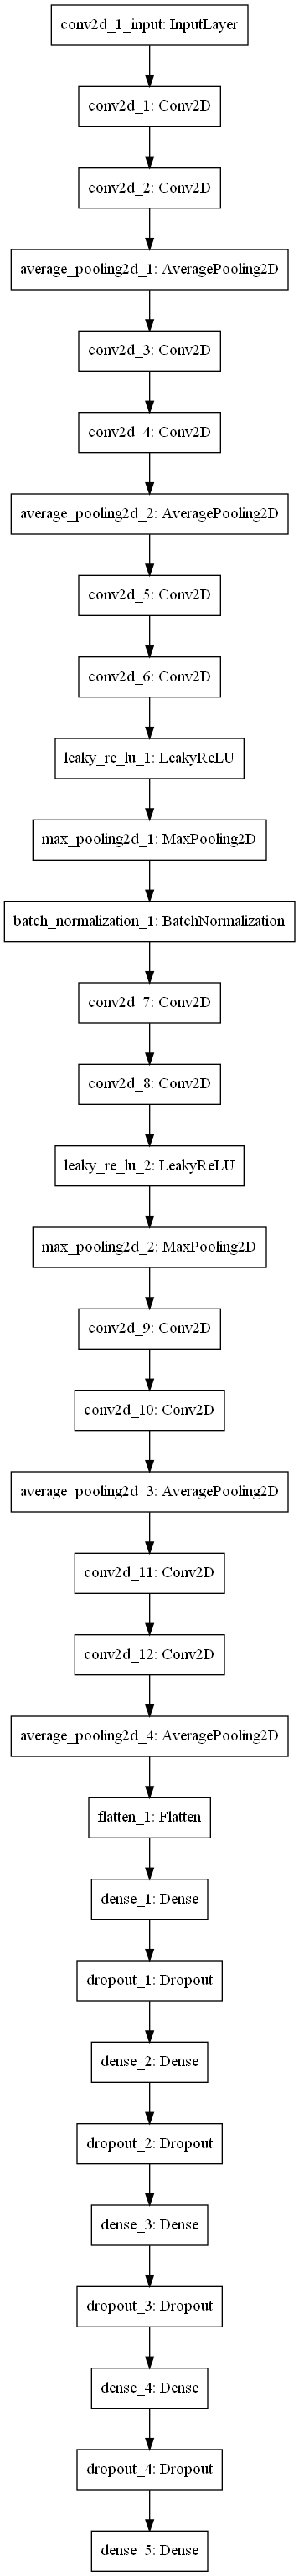

In [4]:
# import os
# os.environ["PATH"] += os.pathsep + r'C:\Program Files\Graphviz\bin'
plot_model(model,to_file='model_1.png')

In [5]:
model.compile(loss='categorical_crossentropy', metrics=['accuracy'], optimizer='adam')

In [6]:
from keras.callbacks import ModelCheckpoint, EarlyStopping
checkpoint = ModelCheckpoint("Shrimp_model_1.h5", monitor='val_accuracy', verbose=1, save_best_only=True, save_weights_only=False, mode='max', period=1)
early = EarlyStopping(monitor='val_accuracy', min_delta=0, patience=15, verbose=1, mode='max')

In [7]:
history = model.fit(
    train_dataset,
    validation_data = test_dataset,
    epochs = 50,
    steps_per_epoch = len(train_dataset),
    validation_steps = len(test_dataset),
    verbose=1,
    callbacks=[checkpoint,early],
    shuffle=True,
    workers = 5
)

Epoch 1/50
1187/1187 [==============================] - 134s 113ms/step - loss: 0.7273 - accuracy: 0.5942 - val_loss: 0.6819 - val_accuracy: 0.5424

Epoch 00001: val_accuracy improved from -inf to 0.54241, saving model to Shrimp_model_1.h5
Epoch 2/50
1187/1187 [==============================] - 131s 110ms/step - loss: 0.5298 - accuracy: 0.7437 - val_loss: 1.5435 - val_accuracy: 0.4446

Epoch 00002: val_accuracy did not improve from 0.54241
Epoch 3/50
1187/1187 [==============================] - 131s 111ms/step - loss: 0.3467 - accuracy: 0.8688 - val_loss: 5.5887 - val_accuracy: 0.6182

Epoch 00003: val_accuracy improved from 0.54241 to 0.61824, saving model to Shrimp_model_1.h5
Epoch 4/50
1187/1187 [==============================] - 132s 111ms/step - loss: 0.3131 - accuracy: 0.8810 - val_loss: 0.5424 - val_accuracy: 0.6984

Epoch 00004: val_accuracy improved from 0.61824 to 0.69836, saving model to Shrimp_model_1.h5
Epoch 5/50
1187/1187 [==============================] - 131s 111ms/ste

1187/1187 [==============================] - 132s 111ms/step - loss: 0.0088 - accuracy: 0.9985 - val_loss: 4.3626 - val_accuracy: 0.7661

Epoch 00039: val_accuracy did not improve from 0.99017
Epoch 40/50
1187/1187 [==============================] - 134s 113ms/step - loss: 0.0252 - accuracy: 0.9942 - val_loss: 2.1458e-06 - val_accuracy: 0.9479

Epoch 00040: val_accuracy did not improve from 0.99017
Epoch 41/50
1187/1187 [==============================] - 134s 113ms/step - loss: 0.0194 - accuracy: 0.9949 - val_loss: 8.0849e-05 - val_accuracy: 0.9765

Epoch 00041: val_accuracy did not improve from 0.99017
Epoch 42/50
1187/1187 [==============================] - 134s 113ms/step - loss: 0.0059 - accuracy: 0.9985 - val_loss: 1.7219e-07 - val_accuracy: 0.9825

Epoch 00042: val_accuracy did not improve from 0.99017
Epoch 43/50
1187/1187 [==============================] - 133s 112ms/step - loss: 0.1100 - accuracy: 0.9664 - val_loss: 0.0108 - val_accuracy: 0.9310

Epoch 00043: val_accuracy did 

dict_keys(['val_loss', 'val_accuracy', 'loss', 'accuracy'])


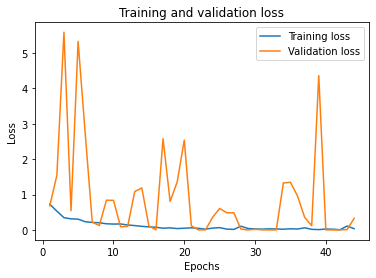

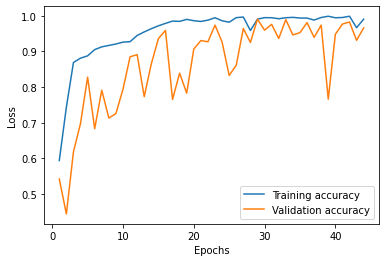

In [8]:
history_dict = history.history
print(history_dict.keys())
loss_values = history_dict['loss']
val_loss_values = history_dict['val_loss']
acc = history_dict['accuracy']
epochs = range(1, len(acc) + 1)
plt.plot(epochs, loss_values, label="Training loss")
plt.plot(epochs, val_loss_values, label='Validation loss')
plt.title("Training and validation loss")
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.savefig("Model_1_trainingVsvalidationLoss.jpeg")
plt.show()

accuracy = history_dict['accuracy']
val_accuracy = history_dict['val_accuracy']
plt.plot(epochs, accuracy, label='Training accuracy')
plt.plot(epochs, val_accuracy, label='Validation accuracy')
plt.xlabel("Epochs")
plt.ylabel('Loss')
plt.legend()
plt.savefig("Model_1_trainingVsvalidationAccuracy.jpeg")
plt.show()

In [11]:
import pandas as pd 
his_df = pd.DataFrame(history_dict)

In [13]:
his_df.to_excel('model_1_history.xlsx',index=False)